In [1]:
# Diffusion Processes on Complex Networks
# Jagoda Lewicka 219951, Applied Mathematics

### 1. Plague model

In [49]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [66]:
import networkx as nx
import random as rn
import seaborn as sns
import imageio

In [51]:
# function that returns dy/dt
def model(x, t):
    # some params   
    b = 3
    beta = 3
    k = 3
    
    # inital conditions
    S = x[0]
    I = x[1]
    
    dSdt = b * S - beta * I * S 
    dIdt = beta * I * S - k * I
    return (dSdt, dIdt)

In [52]:
# test
x0 = [1, 0.1]
model(x0, 0)

(2.7, 0.0)

In [53]:
def main(x0):
    t = np.linspace(0, 20, 1000)
    x = odeint(model, x0, t)
    S = x[:, 0]
    I = x[:, 1]   
    return S, I

In [54]:
S1, I1 = main(x0)
S2, I2 = main([1, 0.5])
S3, I3 = main([1, 1.3])

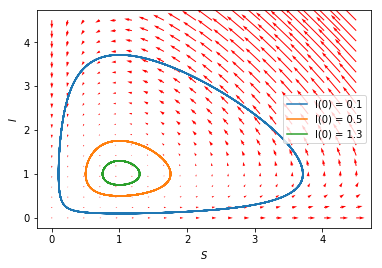

In [55]:
# phase plot
y1 = np.linspace(0, 4.5, 20) #S
y2 = np.linspace(0, 4.5, 20) #I

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = model([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

plt.quiver(Y1, Y2, u, v, color='r')
plt.xlabel('$S$')
plt.ylabel('$I$')
plt.plot(S1, I1, label = "I(0) = 0.1") #path
plt.plot(S2, I2, label = "I(0) = 0.5")
plt.plot(S3, I3, label = "I(0) = 1.3")
plt.legend()
plt.show()

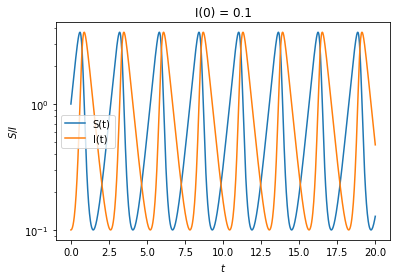

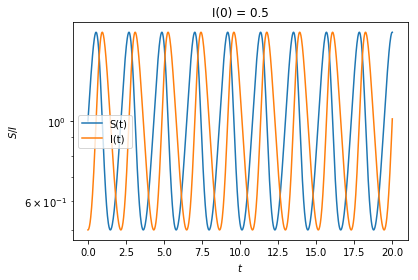

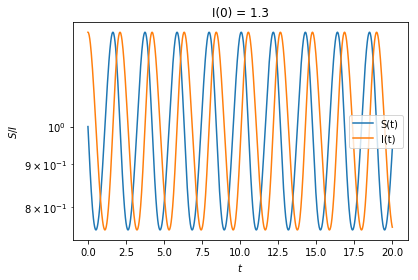

In [56]:
#plotting stuf
t = np.linspace(0, 20, 1000)

plt.semilogy(t, S1, label = "S(t)")
plt.semilogy(t, I1, label = "I(t)")
plt.legend()
plt.title("I(0) = 0.1")
plt.xlabel('$t$')
plt.ylabel('$S/I$')
plt.show()

plt.semilogy(t, S2, label = "S(t)")
plt.semilogy(t, I2, label = "I(t)")
plt.legend()
plt.title("I(0) = 0.5")
plt.xlabel('$t$')
plt.ylabel('$S/I$')
plt.show()

plt.semilogy(t, S3, label = "S(t)")
plt.semilogy(t, I3, label = "I(t)")
plt.legend()
plt.title("I(0) = 1.3")
plt.xlabel('$t$')
plt.ylabel('$S/I$')
plt.show()

### 2. SIR model

In [57]:
# function that returns dy/dt
def model(x, t):
    
    # inital conditions
    S = x[0]
    I = x[1]
    R = x[2]
    
    dSdt = - beta * I * S 
    dIdt = beta * I * S - r * I
    dRdt = r * I
    return (dSdt, dIdt, dRdt)

In [61]:
def main(x0):
    t = np.linspace(0, 100, 100) # A grid of time points (in days)
    x = odeint(model, x0, t)
    S = x[:, 0]
    I = x[:, 1]
    R = x[:, 2]
    return S, I, R

In [62]:
# Contact rate, beta, and mean recovery rate r, (in 1/days).
r = 1
bvals = [0.001, 0.02, 0.03]

# Total population N
N = 100

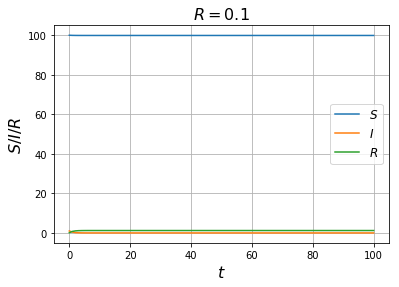

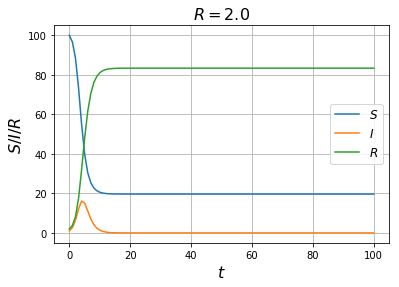

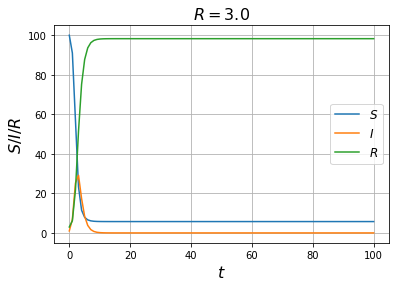

In [63]:
# R0 for different betas
for i in range(len(bvals)):
    beta = bvals[i]
    R0 = beta * N / r 
    
    # Initial number of infected and recovered individuals, I0 and R0.
    # Everyone else, S0, is susceptible to infection initially.
    
    x0 = [100, 1, R0]
    S, I, R = main(x0)
    
    # plotting stuff
    
    # A grid of time points (in days)
    t = np.linspace(0, 100, 100)
    fig = plt.figure()
    plt.plot(t, S, label = "$S$")
    plt.plot(t, I, label = "$I$")
    plt.plot(t, R, label = "$R$")
    plt.title(r"$R = $"+str(R0),fontsize=16)
    plt.xlabel(r"$t$",fontsize=16)
    plt.ylabel(r"$S/I/R$",fontsize=16)
    plt.legend(loc=5,fontsize=12)
    plt.grid()
    plt.show()

Above plots show us that for $R = 0.1$ ($R < 1$) there wasn't any epidemic ($I(t)$ function is constant, equal to 0) but for $R = 2$ or $R = 3$ ($R > 1$) there was an epidemic. 

### (c)

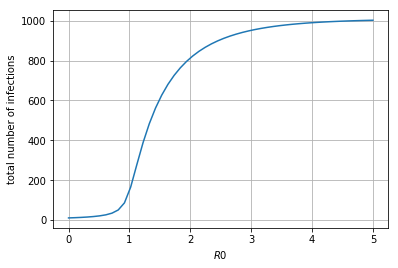

In [124]:
total_num_of_infection = []
R0_vec = []
r = 1
N = 100
bvals = np.linspace(0, 0.05, 50)

for i in range(len(bvals)):
    beta = bvals[i]
    R0 = beta * N / r 
    R0_vec.append(R0)
    x0 = [100, 1, R0]
    S, I, R = main(x0)
    total_num_of_infection.append(np.sum(I))
    
fig = plt.figure()
plt.grid()
plt.plot(R0_vec, total_num_of_infection)
plt.xlabel("$R0$")
plt.ylabel("total number of infections")
plt.show()

Now we can crealy see that epidemic starts with $R_{0} = 1$ and that total number of infections increases when $R_{0}$ increases. 

### (b)

In [17]:
# function that returns dy/dt
def model(x, t):
    
    # inital conditions
    S = x[0]
    I = x[1]
    
    dSdt = - beta * I * S 
    dIdt = beta * I * S - r * I
    return (dSdt, dIdt)

In [55]:
def main(x0):
    t = np.linspace(0, 1, 1000)
    x = odeint(model, x0, t)
    S = x[:, 0]
    I = x[:, 1]
    return S, I

In [56]:
beta = 0.2
r = 170
    
S1, I1 = main([1000, 1])
S2, I2 = main([1000, 50])
S3, I3 = main([1000, 100])
S4, I4 = main([1000, 150])

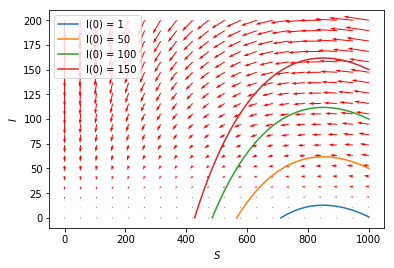

In [57]:
# phase plot
y1 = np.linspace(0, 1000, 20) #S
y2 = np.linspace(0, 200, 20) #I

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = model([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

plt.quiver(Y1, Y2, u, v, color='r')
plt.xlabel('$S$')
plt.ylabel('$I$')
plt.plot(S1, I1, label = "I(0) = 1") #path
plt.plot(S2, I2, label = "I(0) = 50")
plt.plot(S3, I3, label = "I(0) = 100")
plt.plot(S4, I4, label = "I(0) = 150")
plt.legend()
plt.show()

### SIR model on a network 

In [227]:
def SIR(G, gif, beginner_node, p, summary):
    """ Function simulates Susceptible-Infectious-Removed cycle on a given graph.
    
    Parameters 
    ----------
    G : gaph
        Graph on which epidemic spreades
    gif : bool
        If gif is True, the function creates an animated gif
    beginner_node : int or bool
        If beginer_node is False then beginner node is being chosen randomly
    p : int
        Probability in which one node infects its neighbors
    summary: bool
        If summary is True then summary is being printed
    """
    
    pos = nx.spring_layout(G) # needed for plotting stuff
    
    images = [] # needed for gif
    
    infected_nodes = []
    recovered_nodes = []
    susceptible_nodes = list(G.nodes()) # all nodes are susceptible
    
    if beginner_node == False:
        beginner_node = rn.choice(susceptible_nodes)
    
    infected_nodes.append(beginner_node)
    counter_of_infected = 1
    
    # plot of first step
    if gif == True:
        color_map_nodes = []
            
        for node in list(G.nodes()):
            
            if node == beginner_node:
                color_map_nodes.append('darkred')
                
            else: 
                color_map_nodes.append('yellow')  
                        
        fig = plt.figure()
        plt.title("SIR dynamics")            
        nx.draw_networkx(G, pos = pos, node_color=color_map_nodes, with_labels=True)
        plt.savefig("SIR_dynamics"+str(0)+".jpg") 
        images.append(imageio.imread("SIR_dynamics"+str(0)+".jpg"))
        plt.close(fig)
    
    while len(infected_nodes) > 0: 
        
        for u in infected_nodes:
            list_of_infected_by_u = [] 
            
            for v in G.neighbors(u):
                
                if (v in susceptible_nodes) and (v not in infected_nodes) and (v not in recovered_nodes): 
                    P = rn.random()
                    
                    if P <= p:
                        list_of_infected_by_u.append(v)
                        infected_nodes.append(v)
                        counter_of_infected = counter_of_infected + 1
            
            # plotting stuff
            if gif == True:
                color_map_nodes = []
            
                for node in list(G.nodes()):
                    if node in list_of_infected_by_u:
                        color_map_nodes.append('red')
                        
                    elif node == u:
                        color_map_nodes.append('darkred')
                        
                    elif (node != u) and (node in infected_nodes):
                        color_map_nodes.append('red')
                    
                    elif node in recovered_nodes:
                        color_map_nodes.append('green')
        
                    else: 
                        color_map_nodes.append('yellow')  
                        
                fig = plt.figure()
                plt.title("SIR dynamics") 
                nx.draw_networkx(G, pos = pos, node_color=color_map_nodes, with_labels=True)
                plt.savefig("SIR_dynamics"+str(counter_of_infected)+".jpg") 
                images.append(imageio.imread("SIR_dynamics"+str(counter_of_infected)+".jpg"))
                plt.close(fig)
            
            recovered_nodes.append(u)
            infected_nodes.remove(u)
            if u in susceptible_nodes:
                susceptible_nodes.remove(u)
            
    if gif == True:
        imageio.mimsave('GIF_SIR_dynamics.gif', images, fps = 1)
        
    if summary == True:  
        print("Node {} has started the epidemic. During the epidemic {} individuals were infected and {} recovered".format(beginner_node, counter_of_infected, len(recovered_nodes)))           
    
    return counter_of_infected/len(list(G.nodes()))
        
            
            

### (f)

In [ ]:
# yellow nodes are susceptible, green nodes are recovered, red nodes are infected at the time, 
# and darkred nodes are those which infects others at particular step

In [228]:
# epidemic on a 2D lattice
L = nx.grid_graph(dim = [5, 5])
result = SIR(L, True, False, 0.5, True)

Node (2, 4) has started the epidemic. During the epidemic 1 individuals were infected and 1 recovered


In [180]:
G = nx.erdos_renyi_graph(30, 1/5, seed=None, directed=False)
result = SIR(G, True, False, 0.5, True)

Node 5 has started the epidemic. During the epidemic 27 individuals were infected and 27 recovered


In [181]:
G = nx.barabasi_albert_graph(30, 3, seed=None)
result = SIR(G, True, False, 0.5, True)

Node 7 has started the epidemic. During the epidemic 28 individuals were infected and 28 recovered


In [182]:
G = nx.watts_strogatz_graph(30, 2, 1/3, seed=None)
result = SIR(G, True, False, 0.5, True)

Node 23 has started the epidemic. During the epidemic 4 individuals were infected and 4 recovered


### (b)

In [231]:
G = nx.grid_graph(dim = [5, 5])
p_list = np.linspace(0, 1, 20)
frac_list = []
for p in p_list:
    frac = []
    for i in range(100):
        f = SIR(G, False, (3, 2), p, False)
        frac.append(f)
    frac_list.append(np.mean(frac))

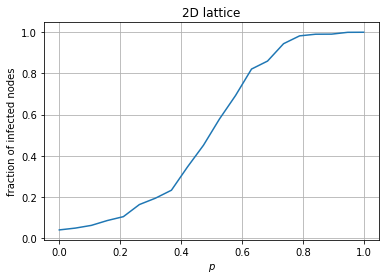

In [232]:
plt.plot(p_list, frac_list)
plt.xlabel("$p$")
plt.ylabel("fraction of infected nodes")
plt.grid()
plt.title("2D lattice")
plt.show()

In [186]:
G = nx.barabasi_albert_graph(50, 3, seed=None)
p_list = np.linspace(0, 1, 20)
frac_list = []
for p in p_list:
    frac = []
    for i in range(100):
        f = SIR(G, False, 3, p, False)
        frac.append(f)
    frac_list.append(np.mean(frac))

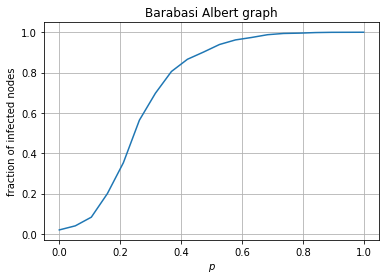

In [187]:
plt.plot(p_list, frac_list)
plt.xlabel("$p$")
plt.ylabel("fraction of infected nodes")
plt.grid()
plt.title("Barabasi Albert graph")
plt.show()

### (c) Discuss how the infection curves compare to the behavior seen in the ODE model.

We can obtain that there is a correlation between R0 and p, that both of them has simmilar impact for infection spreading, while R0 and p is bigger than infection spreades faster. While exploring fraction of infected nodes on 2D lattice we can assume that R0 value has stronger impact because function of total number of infections of R0 raises faster than above function. But while we look at fraction of infected nodes on BA graph we got quite identical curves. 